In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255.0

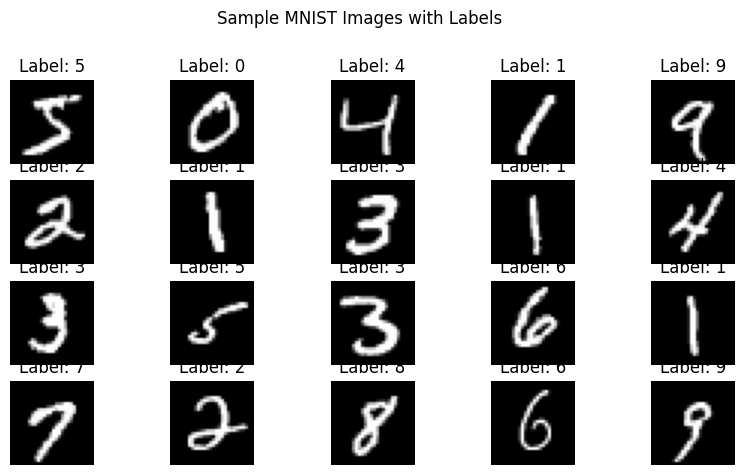

In [6]:
# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.show()

In [7]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=108,
                    validation_data=(test_images, test_labels),
                    verbose=2)

Epoch 1/20
556/556 - 14s - 25ms/step - accuracy: 0.9044 - loss: 0.3117 - val_accuracy: 0.9639 - val_loss: 0.1124
Epoch 2/20
556/556 - 10s - 18ms/step - accuracy: 0.9527 - loss: 0.1516 - val_accuracy: 0.9711 - val_loss: 0.0933
Epoch 3/20
556/556 - 9s - 17ms/step - accuracy: 0.9645 - loss: 0.1143 - val_accuracy: 0.9743 - val_loss: 0.0808
Epoch 4/20
556/556 - 8s - 15ms/step - accuracy: 0.9701 - loss: 0.0985 - val_accuracy: 0.9762 - val_loss: 0.0784
Epoch 5/20
556/556 - 9s - 17ms/step - accuracy: 0.9732 - loss: 0.0867 - val_accuracy: 0.9802 - val_loss: 0.0675
Epoch 6/20
556/556 - 9s - 17ms/step - accuracy: 0.9746 - loss: 0.0782 - val_accuracy: 0.9806 - val_loss: 0.0640
Epoch 7/20
556/556 - 8s - 15ms/step - accuracy: 0.9778 - loss: 0.0710 - val_accuracy: 0.9798 - val_loss: 0.0653
Epoch 8/20
556/556 - 10s - 18ms/step - accuracy: 0.9780 - loss: 0.0684 - val_accuracy: 0.9807 - val_loss: 0.0630
Epoch 9/20
556/556 - 11s - 19ms/step - accuracy: 0.9798 - loss: 0.0635 - val_accuracy: 0.9789 - val_l

In [10]:

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9809 - loss: 0.0688

Test Accuracy: 0.9842


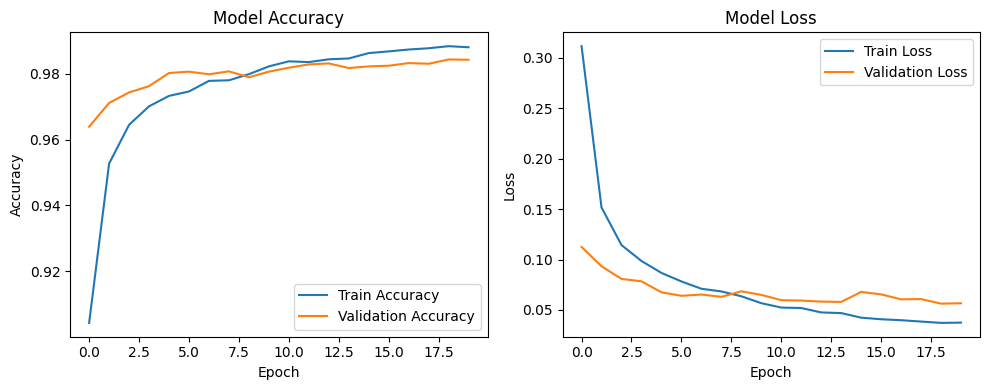

In [11]:
# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


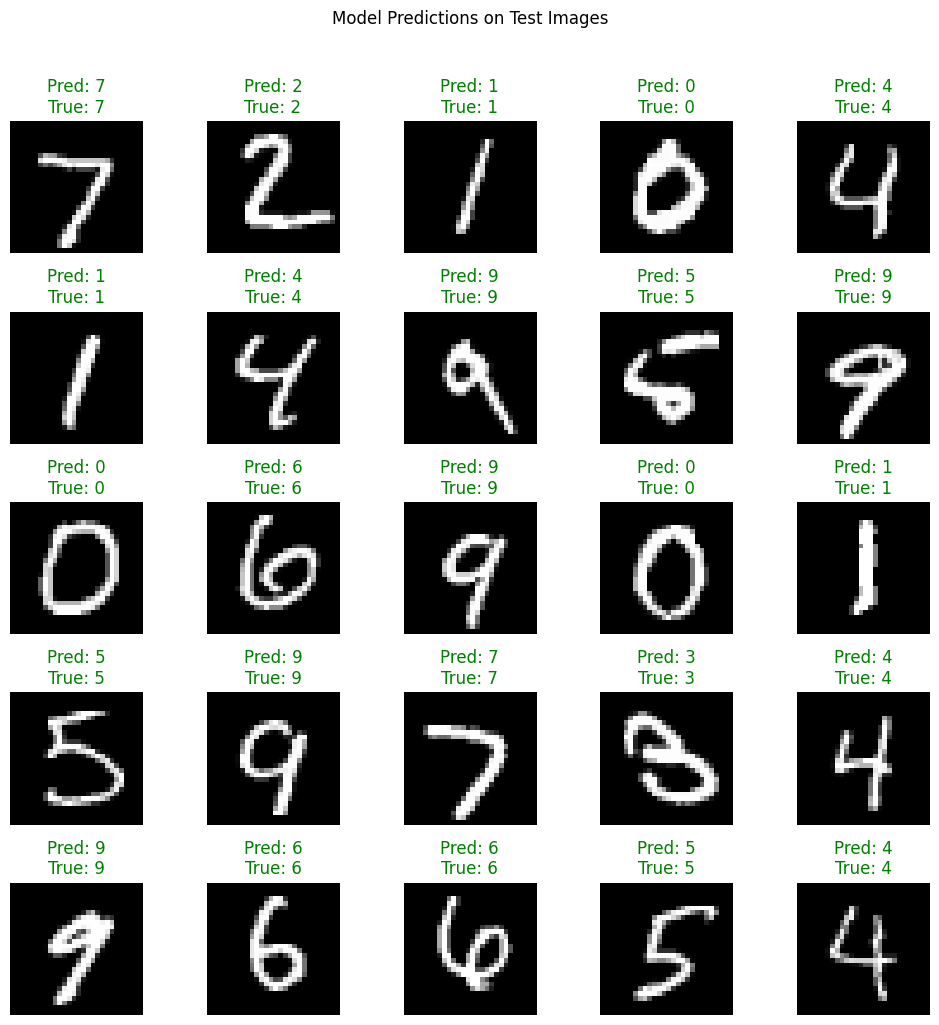

In [12]:
# Predict and visualize predictions vs true labels
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.suptitle('Model Predictions on Test Images', y=1.02)
plt.tight_layout()
plt.show()